<a href="https://colab.research.google.com/github/whiteknight40/ML/blob/main/Machine_Learning_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
file = pd.read_csv('linear_regression_train.csv')
print(file.shape)

(48000, 27)


In [ ]:
n_sets,n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 25)
(48000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math,copy
np.set_printoptions(precision=2)


In [ ]:
def train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  split_idx=int(len(X)*(1-test_size))
  train_indices=indices[:split_idx]
  test_indices=indices[split_idx:]
  X_train, X_test=X[train_indices],X[test_indices]
  y_train, y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train, y_test

In [ ]:
_,n=X_train.shape
b_init=0
w_init=np.zeros(n)

In [ ]:
def cost(x,y,w,b):
  m,_=x.shape
  J=0.
  J=np.sum((np.dot(x,w)+b-y)**2)
  return J/(2*m)

In [ ]:
def compute_gradient(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros((n,))
  dj_db=0.
  dj_dw=np.dot(x.T,(np.dot(x,w)+b-y))
  dj_db=np.sum(np.dot(x,w)+b-y)
  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw,dj_db


In [ ]:
def gradient_descent(x,y,w_init,b_init,alpha,n_iterations,batch_size):
  J_history=[]
  w=w_init.copy()
  b=b_init
  m,n=x.shape
  for i in range (n_iterations):
    for batch_start in range(0, m, batch_size):
        batch_end = batch_start + batch_size
        x_batch = x[batch_start:batch_end]
        y_batch = y[batch_start:batch_end]
        dj_dw,dj_db=compute_gradient(x_batch,y_batch,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
    J_history.append(cost(x,y,w,b))
    if(i%math.ceil(n_iterations/10)==0):

      print(f"Iteration {i:4d}: Cost: {J_history[-1]:8.2f} ")
  return w,b,J_history


In [ ]:
def compute_mean_squared_error(y_true, y_pred):
    mse = (sum((y_true - y_pred) ** 2 )) / n
    return mse

Iteration    0: Cost: 2356279.34 
Iteration  100: Cost: 478990.50 
Iteration  200: Cost: 223138.58 
Iteration  300: Cost: 142117.68 
Iteration  400: Cost: 113919.38 
Iteration  500: Cost: 103488.07 
Iteration  600: Cost: 99385.56 
Iteration  700: Cost: 97658.11 
Iteration  800: Cost: 96873.38 
Iteration  900: Cost: 96487.16 
b,w found by gradient descent: 0.48,[ 12.97   6.35  12.3   18.28  -1.74  47.24  11.96  -8.9   15.34   7.13
  -0.21  -0.49  23.81  58.91   1.81  26.25   0.41  13.53  30.38  43.97
   1.91  -0.33 -25.37  12.07   0.13] 


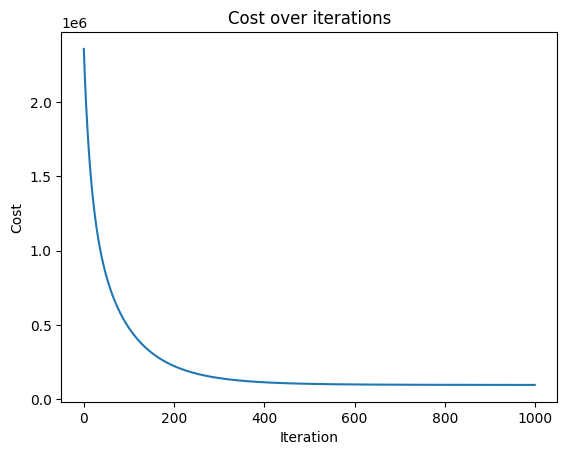

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
n_iter=1000
alpha=5.0e-8
w_final,b_final,J_hist=gradient_descent(X_train,y_train,w_init,b_init,alpha,n_iter,100)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
y_pred=np.dot(w_final,X_test)+b_final
mse=compute_mean_squared_error(y_test,y_pred)
print(f"Mean Squared error finally: {mse}")
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()

# Polynomial Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving polynomial_regression_train.csv to polynomial_regression_train.csv


In [ ]:
import pandas as pd
file = pd.read_csv('polynomial_regression_train.csv')
print(file.shape)

(48000, 7)


In [ ]:
n_sets,n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 5)
(48000,)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def generate_polynomial_features(X, degree):
    m, n = X.shape
    poly_features = X.copy()
    for d in range(2, degree + 1):
        for i in range(n):
            for j in range(i, n):
                if d == 2:
                    poly_features = np.hstack((poly_features, (X[:, i] * X[:, j]).reshape(-1, 1)))
                else:
                    poly_features = np.hstack((poly_features, (poly_features[:, i] * X[:, j]).reshape(-1, 1)))
    return poly_features

In [ ]:
def cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    J = np.sum(errors ** 2) / (2 * m)
    return J

In [ ]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db


In [ ]:
def gradient_descent(X, y, w_init, b_init, alpha, batch_size, n_iterations):
    m, n = X.shape
    w = w_init.copy()
    b = b_init
    J_history = []
    for iteration in range(n_iterations):
        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            dj_dw, dj_db = compute_gradient(X_batch, y_batch, w, b)

            w -= alpha * dj_dw
            b -= alpha * dj_db

        if (iteration % (math.ceil(n_iterations/10)) == 0):
            J = cost(X, y, w, b)
            J_history.append(J)
            print(f"Iteration {iteration:4d}: Cost: {J}")
    return w, b, J_history

(48000, 20) (48000,)
Iteration    0: Cost: 5.707704713566058e-17
Iteration  100: Cost: 5.505285791450526e-17
Iteration  200: Cost: 5.318841468575768e-17
Iteration  300: Cost: 5.146814005556551e-17
Iteration  400: Cost: 4.9879094961549575e-17
Iteration  500: Cost: 4.8410175587028784e-17
Iteration  600: Cost: 4.705162109508953e-17
Iteration  700: Cost: 4.5794704928582756e-17
Iteration  800: Cost: 4.4631535100436986e-17
Iteration  900: Cost: 4.355491972428257e-17
Prediction: 0.00, Target: 0.000000
Prediction: -0.00, Target: -0.000000
Prediction: 0.00, Target: 0.000000
Prediction: -0.00, Target: -0.000000
Prediction: -0.00, Target: -0.000000
Prediction: -0.00, Target: -0.000000
Prediction: -0.00, Target: -0.000000
Prediction: -0.00, Target: 0.000000
Prediction: 0.00, Target: -0.000000
Prediction: -0.00, Target: -0.000000


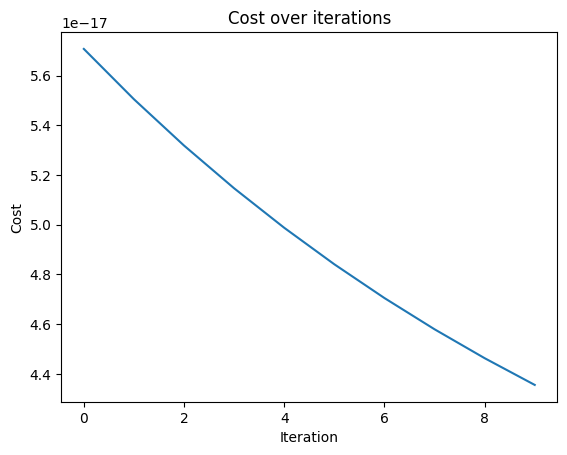

In [ ]:
degree = 2
X_poly = generate_polynomial_features(x_train, degree)
print(X_poly.shape, y_train.shape)
m_train, n_train = X_poly.shape
w_init = np.zeros(n_train)
b_init = 0.0
alpha = 5.0e-7
batch_size = 100
n_iterations=1000
w_final, b_final, J_history = gradient_descent(X_poly, y_train, w_init, b_init, alpha, batch_size,n_iterations)
for i in range(10):
    prediction = np.dot(X_poly[i], w_final) + b_final
    print(f"Prediction: {prediction:.2f}, Target: {y_train[i]:f}")
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over iterations")
plt.show()

# Logistic Regression (binary classification)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving binary_classification_train.csv to binary_classification_train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file=pd.read_csv('binary_classification_train.csv')
print(file.shape)

(48000, 22)


In [ ]:
n_sets, n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 20)
(48000,)


In [ ]:
def train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  split_idx=int(len(X)*(1-test_size))
  train_indices=indices[:split_idx]
  test_indices=indices[split_idx:]
  X_train, X_test=X[train_indices],X[test_indices]
  y_train, y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train, y_test

In [ ]:
def sigmoid(z):
  sig=1/(1+np.exp(-z))
  return sig

In [ ]:
def cost(X,y,w,b):
  m,_=X.shape
  z=np.dot(X,w)+b
  f_wb=sigmoid(z)
  cost=(-1/m) * np.sum(y * np.log(f_wb) + (1-y) * np.log(1-f_wb))
  return cost

In [ ]:
def compute_gradient(X,y,w,b):
  m,n=X.shape
  dj_dw=np.zeros(n)
  dj_db=0.
  cosht=sigmoid(np.dot(X,w)+b)-y
  dj_dw=np.dot(X.T,cosht)/m
  dj_db=np.sum(cosht)/m
  return dj_dw, dj_db

In [ ]:
def gradient_descent(X, y, w_init, b_init, alpha, batch_size, n_iterations):
    w = w_init.copy()
    b = b_init
    m = X.shape[0]
    J_history = []

    for iteration in range(n_iterations):
        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            dj_dw, dj_db = compute_gradient(X_batch, y_batch, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db

        if iteration % 100 == 0:
            J = cost(X, y, w, b)
            J_history.append(J)
            print(f"Iteration {iteration:4d}: Cost {J:8f}")
    print(f"Final cost: {J_history[-1]}")

    return w, b, J_history

Iteration    0: Cost 0.429431
Iteration  100: Cost 0.245109
Iteration  200: Cost 0.244549
Iteration  300: Cost 0.244366
Iteration  400: Cost 0.244288
Iteration  500: Cost 0.244251
Iteration  600: Cost 0.244232
Iteration  700: Cost 0.244221
Iteration  800: Cost 0.244213
Iteration  900: Cost 0.244207
Final cost: 0.24420694450650118


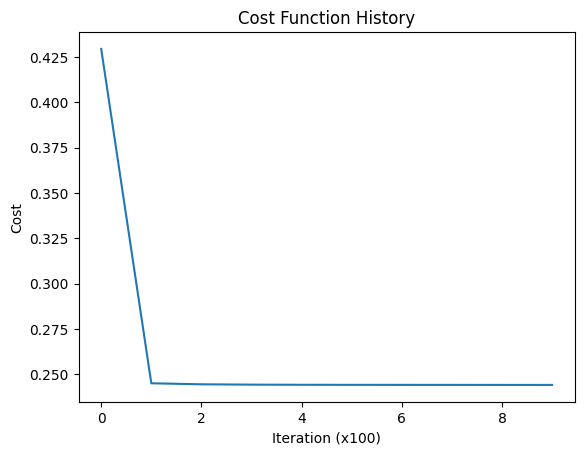

Test accuracy: 93.05


In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
m,n=X_train.shape
w_initial=np.zeros(n)
b_initial=0.
alpha=5e-07
batch_size=100
n_iterations=1000
w_final,b_final,J_history=gradient_descent(X_train,y_train,w_initial,b_initial,alpha, batch_size,n_iterations)
plt.plot(range(len(J_history)),J_history)
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.show()
y_pred_test=sigmoid(np.dot(X_test,w_final)+b_final)>=0.5
accuracy=np.mean(y_pred_test == y_test)*100
print(f"Test accuracy: {accuracy:.2f}")
if X_train.shape[1]==2:
  plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='viridis',alpha=5e-07)
  x_boundary=np.linspace(X_test[:,0].min(),X_test[:,0].max(),100)
  y_boundary=-(w_final[0]*x_boundary+b_final)/w_final[1]
  plt.plot(x_boundary,y_boundary,color='red',linewidth=2)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Decision Boundary")
  plt.show()

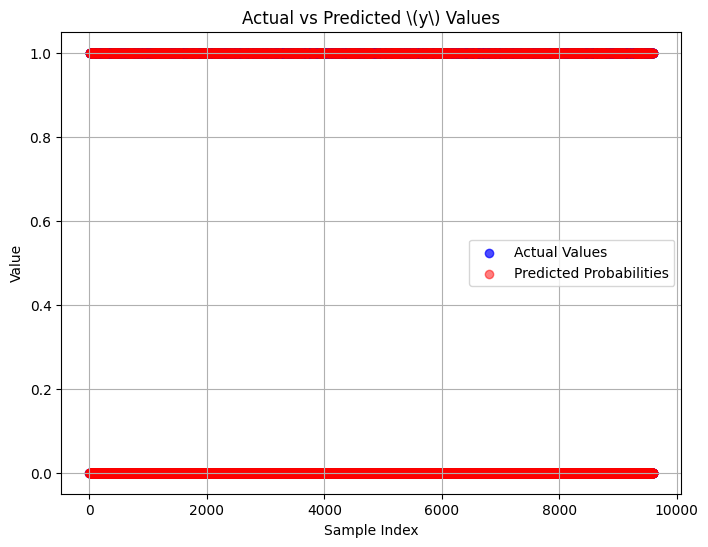

In [ ]:

y_pred_probs = sigmoid(np.dot(X_test, w_final) + b_final)>0.5

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", alpha=0.7, label="Actual Values")
plt.scatter(range(len(y_test)), y_pred_probs, color="red", alpha=0.5, label="Predicted Probabilities")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted (y) Values")
plt.legend()
plt.grid(True)
plt.show()


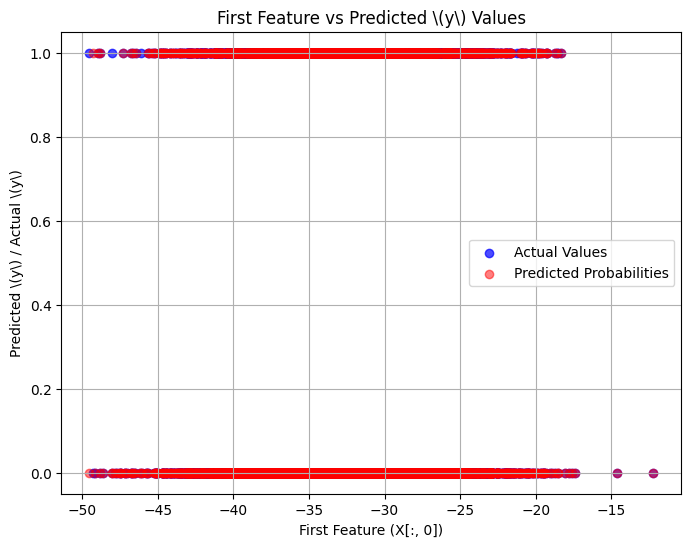

In [ ]:
# Compute predicted probabilities for the test set
y_pred_probs = sigmoid(np.dot(X_test, w_final) + b_final)>=0.5

# Plot the first feature vs predicted y values
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color="blue", alpha=0.7, label="Actual Values")
plt.scatter(X_test[:, 0], y_pred_probs, color="red", alpha=0.5, label="Predicted Probabilities")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted (y) / Actual (y)")
plt.title("First Feature vs Predicted (y) Values")
plt.legend()
plt.grid(True)
plt.show()
